# 1. Naive Bayes


In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.datasets import load_iris
import seaborn as sns; sns.set(color_codes=True)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
#----------------------------------------------
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [2]:
#-------------------------------------
gnb = GaussianNB()
gnb.fit(df,iris.target)
print('Score: ', gnb.score(df,iris.target))
#-------------------------------------

Score:  0.96


## Multinomial Naive Bayes

* Funciona como classificacao de dados com caracteristicas discretas
* Util em processamento textual
* Cada texto e convertido em vetor de contador de palavras
* nao funciona com numeros negativos

In [3]:
food_review = pd.read_csv('Reviews.csv')
print('-'*50)
print('Colunas: ', food_review.columns)
print('-'*50)
print(food_review.info())
print('-'*50)
print(food_review[['Text','Score']].head(10))
print('-'*50)

--------------------------------------------------
Colunas:  Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
Id                        568454 non-null int64
ProductId                 568454 non-null object
UserId                    568454 non-null object
ProfileName               568438 non-null object
HelpfulnessNumerator      568454 non-null int64
HelpfulnessDenominator    568454 non-null int64
Score                     568454 non-null int64
Time                      568454 non-null int64
Summary                   568427 non-null object
Text                      568454 non-null object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB
None
--------------------------------------------------
                  

In [4]:
data = food_review[['Text','Score']]
data = data.loc[data.Score != 3]
data['Sentiment'] = data.Score.map(lambda s:0 if s < 3 else 1)
data.drop('Score', axis=1, inplace=True)
print(data.head())
print('-'*50)
print('Sentimento:\n', data.Sentiment.value_counts())
print('-'*50)

                                                Text  Sentiment
0  I have bought several of the Vitality canned d...          1
1  Product arrived labeled as Jumbo Salted Peanut...          0
2  This is a confection that has been around a fe...          1
3  If you are looking for the secret ingredient i...          0
4  Great taffy at a great price.  There was a wid...          1
--------------------------------------------------
Sentimento:
 1    443777
0     82037
Name: Sentiment, dtype: int64
--------------------------------------------------


In [5]:
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[A-Za-z]+')
data.Text = data.Text.map(lambda x:token.tokenize(x))
print(data.Text.head())

0    [I, have, bought, several, of, the, Vitality, ...
1    [Product, arrived, labeled, as, Jumbo, Salted,...
2    [This, is, a, confection, that, has, been, aro...
3    [If, you, are, looking, for, the, secret, ingr...
4    [Great, taffy, at, a, great, price, There, was...
Name: Text, dtype: object


**Stemming**
* Uma **root** e uma forma de palavra que nao e possivel mais analisala. Ex: Whellchair: whell + chair

**Derivacao morfologica**
* Resulta na criacao de uma nova palavra com um novo sentido

**Inflicao morfologica**
* Involve uma obrigadoria especificacao gramatica

**steam**
* Uma **steam** preocupa-se apenas em lidar com a **inflectional morphology**, que nao muda o sentido central da palavra.

In [6]:
#-----Consome muito a CPU, demora pra rodar.
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
#-----
#data.Text = data.Text.map(lambda l: [stemmer.stem(word) for word in l])
#data.Text = data.Text.str.join(sep=' ')
#------
data_sample = data.sample(10000)
data_sample.Text = data_sample.Text.map(lambda l: [stemmer.stem(word) for word in l])
data_sample.Text = data_sample.Text.str.join(sep='')

In [7]:
#--Preprocessing
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')
data_tf = cv.fit_transform(data_sample.Text)
print(data_tf.shape)

(10000, 9801)


In [8]:
#----------- Splittin data
from sklearn.model_selection import train_test_split;
train_x,test_x,train_y,test_y = train_test_split(data_tf, data_sample.Sentiment)
#-------- modelo
data_sample.Sentiment.value_counts()

1    8423
0    1577
Name: Sentiment, dtype: int64

In [9]:
#------Classe imbalanceada ---- Usa-se Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB(class_prior=[.25,.75])
mnb.fit(train_x,train_y)

MultinomialNB(alpha=1.0, class_prior=[0.25, 0.75], fit_prior=True)

In [10]:
y_pred = mnb.predict(test_x)
mnb.score(test_x,test_y)

0.836

In [11]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_y,y_pred=y_pred)

array([[   2,  410],
       [   0, 2088]])

**Bernoulli Naive Bayes**
* Bom para dados discretos
* a diferenca e que o Multinomial trabalha com contagem de ocorrencias
* BernoulliNB e designada para caracteristicas binarias/boolean
* Se os dados nao forem binarios, ocorre um processo de binarizacao interna
* lida com numeros negativos

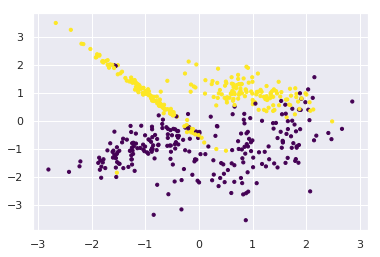

In [12]:
from sklearn.datasets import make_classification
X, Y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0)
#-------
f = plt.figure()
plt.scatter(X[:,0],X[:,1],c=Y,s=10,cmap='viridis')
plt.show()

In [13]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import BernoulliNB
scalar = MinMaxScaler()
X = scalar.fit_transform(X)
train_x, test_x, train_y, test_y = train_test_split(X,Y)
bnb = BernoulliNB(binarize=0.5)
mnb = MultinomialNB()
#------------------
bnb.fit(train_x,train_y)
mnb.fit(train_x,train_y)
#---------------------
print('Bernulli Score:', bnb.score(test_x,test_y))
print('Multinomial Score:', mnb.score(test_x,test_y))

Bernulli Score: 0.928
Multinomial Score: 0.584


In [14]:
h = .02
x_min = X[:, 0].min() - .5
x_max = X[:, 0].max() + .5
y_min = X[:, 1].min() - .5
y_max = X[:, 1].max() + .5

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

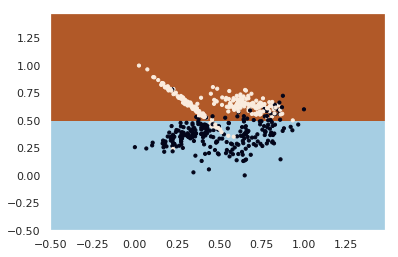

In [15]:
Z = bnb.predict(np.c_[xx.flatten(), yy.flatten()])
Z = Z.reshape(xx.shape)

f = plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=Y, s=10)
plt.show()

**Out-of-core Training**
* Naive Bayes suporta funcao partial_fit
* Para dados que nao cabem na RAM, usa-se partial_fit para treinar o modelo gradualmente

In [18]:
from sklearn.feature_extraction.text import HashingVectorizer
vectorizer = HashingVectorizer(decode_error='ignore', n_features=2 ** 12, alternate_sign=False)

data_chunk = pd.read_csv('Reviews.csv', chunksize=10000)

In [22]:
test = pd.read_csv('Reviews.csv').sample(5000)
#-----------------------------------------
test = test[['Text', 'Score']]
test = test[test.Score != 3]
test['Sentiment'] = test.Score.map(lambda s:0 if s < 3 else 1)
test.Text = test.Text.map(lambda x: token.tokenize(x))
test.Text = test.Text.map(lambda l: [stemmer.stem(word) for word in l])
test.Text = test.Text.str.join(sep=' ')
test_tf = vectorizer.transform(test.Text)
#-------------------------------------------
mnb = MultinomialNB(class_prior=[.22,.78])
#-------------------------------------------
#* Pegar dados Truncados cada vez e Faz o fitting do modelo e gradualmente improva a si

for idx, data_sample in enumerate(data_chunk):
    print('Robo: ',idx)
    data_sample = data_sample[['Text','Score']]
    data_sample = data_sample[data_sample.Score != 3]
    data_sample['Sentiment'] = data_sample.Score.map(lambda s:0 if s < 3 else 1)
    data_sample.Text = data_sample.Text.map(lambda x:token.tokenize(x))
    data_sample.Text = data_sample.Text.map(lambda l: [stemmer.stem(word) for word in l])
    data_sample.Text = data_sample.Text.str.join(sep=' ')
    text_tf = vectorizer.transform(data_sample.Text)
    mnb.partial_fit(text_tf, data_sample.Sentiment, classes=[0,1])
    y_pred = mnb.predict(test_tf)
    print(confusion_matrix(y_pred=y_pred, y_true=test.Sentiment))


Robo:  0
[[   0  719]
 [   1 3930]]
Robo:  1
[[  10  709]
 [   2 3929]]
Robo:  2
[[  18  701]
 [   3 3928]]
Robo:  3
[[  28  691]
 [   3 3928]]
Robo:  4
[[  33  686]
 [   3 3928]]
Robo:  5
[[  37  682]
 [   3 3928]]
Robo:  6
[[  41  678]
 [   3 3928]]
Robo:  7
[[  41  678]
 [   2 3929]]
Robo:  8
[[  40  679]
 [   2 3929]]
Robo:  9
[[  42  677]
 [   2 3929]]
Robo:  10
[[  42  677]
 [   2 3929]]
Robo:  11


KeyboardInterrupt: 